In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


C:\Users\HG\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.757e+16, tolerance: 1.898e+13
  model = cd_fast.enet_coordinate_descent(


Linear Regression: 326921972696502.8
Ridge Regression: 327024874210879.44
Lasso Regression: 341689441558124.0
Random Forest Regression: 465538264125179.5
Gradient Boosting Decision Tree Regression: 504970771972729.06
Support Vector Regression: 587290289648105.9
Decision Tree Regression: 663757135706800.0


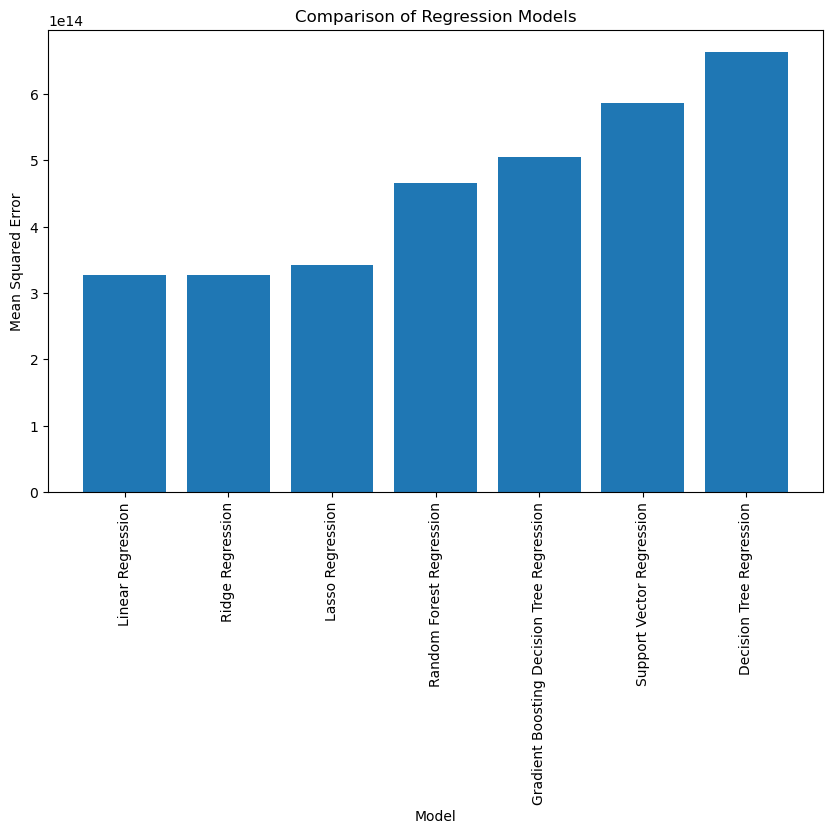

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import yfinance as yf
# 下载数据
df = yf.download('AAPL', start='2022-01-01', end='2023-07-01')
# 提取特征和目标变量
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# 创建模型列表
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Support Vector Regression', SVR()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Decision Tree Regression', GradientBoostingRegressor())
]
# 初始化结果列表
results = []
# 对每个模型进行训练和预测
for name, model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    results.append((name, mse))
# 按照mse排序
results.sort(key=lambda x: x[1])
# 输出结果
for name, mse in results:
    print(f'{name}: {mse}')
# 绘制条形图
plt.figure(figsize=(10,6))
plt.bar(*zip(*results))
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Models')
plt.xticks(rotation=90)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# 下载苹果股票数据
data = yf.download('AAPL', start='2022-01-01', end='2023-07-01')
# 计算每日收益率
returns_daily = data['Close'].pct_change()

# 删除NaN值
returns_daily = returns_daily.dropna()
# 标签化收益率：大于0的日子为“正向收益日”（标签为1），小于或等于0的日子为“非正向收益日”（标签为0）
labels = np.where(returns_daily > 0, 1, 0)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(returns_daily.values.reshape(-1, 1), labels, test_size=0.2, random_state=42)
# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 初始化模型
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC()
]
# 训练并评估模型
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}")

[*********************100%***********************]  1 of 1 completed
LogisticRegression accuracy: 0.9866666666666667
DecisionTreeClassifier accuracy: 1.0
RandomForestClassifier accuracy: 1.0
GradientBoostingClassifier accuracy: 1.0
SVC accuracy: 0.9733333333333334
